There is some algorithms for which data should be scaled and should have some form.
take for example  data of school student marks gpa will score between 0 to 4 and sap will give marks between 
400 to 1600
gpa(score)--0-4
sap(score) --- 400-1600

in this case we need to scale your dataset becase gpa has very smaler numbers than sap score numbers

For this we should know how to scale the data :

we are using skit learn to scale our data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
#to ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
movie_data=pd.read_csv('C:\\Users\\win8\\Desktop\\DataScienceRunningNotes\\DSFromLearningHub\\Dataset\\IMDB-Movie-Data.csv',sep=",")
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
#drop missing values is the first step ,missing values will occure problem
movie_data=movie_data.dropna()

In [6]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Here if we observe the data imdb rating is given in the scale of 1 to 10 by users and metascore ratting is in scale of 10 to 100 by critics

In [7]:
#to check how many rows in the dataset we can use len function
len(movie_data)

838

In [8]:
movie_data['Year'].value_counts() #how many films in year

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

In [9]:
movie_data.describe() #it will gives u info of numeric column distrubution 

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


#Binarizer is used to convert columns in to 1's and 0's based on some threshold value 
for example here we have rating column from this we have to maked 0,1 based on certaing rating
i.e greter than 7 is 1 and lessthan 7 is 0 for this we can you binarizer. hit or flop will dicide based on this
and we can convert continous data to binary data by using binarizer


In [10]:
from sklearn.preprocessing import Binarizer
#binarizer will convert continuos data into catagerical values

In [11]:
binarizer=Binarizer(threshold=7).fit(movie_data[['Rating']])

In [12]:
binarizer  
#here binarizer will copy the colum ,this will not overwirte the cloumn 
#if we want we can do that by uisng inplace=true

Binarizer(copy=True, threshold=7)

In [13]:
#till now it is not transfomed to binary data we have use transform function to transform 
binary_x=binarizer.transform(movie_data[['Rating']])

In [14]:
binary_x #retrun numpy array
print(binary_x[0:10,:])

[[1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [15]:
#to do side by side comparison we have to create df from binary_x and concat to first df
binary_rating_df=pd.DataFrame(data=binary_x,columns=['Binary_Rating'])
binary_rating_df.head()

,Binary_Rating
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0


In [16]:
movie_data_updated=pd.concat([movie_data,binary_rating_df],axis=1)
movie_data_updated[['Title','Year','Rating','Binary_Rating']].head(10)

,Title,Year,Rating,Binary_Rating
0,Guardians of the Galaxy,2014.0,8.1,1.0
1,Prometheus,2012.0,7.0,0.0
2,Split,2016.0,7.3,1.0
3,Sing,2016.0,7.2,1.0
4,Suicide Squad,2016.0,6.2,0.0
5,The Great Wall,2016.0,6.1,0.0
6,La La Land,2016.0,8.3,1.0
7,NaN,NaN,NaN,1.0
8,The Lost City of Z,2016.0,7.1,0.0
9,Passengers,2016.0,7.0,1.0


In [17]:
movie_data_updated.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Binary_Rating
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179,0.424821
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416,0.494611
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000,0.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000,0.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000,0.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000,1.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000,1.000000


In [18]:
#From binary_rating we can say 42% of data having data 1 and rest values are 0

sklearn offers one more scaler minmax scaler which helps us to scale datapoints into same range
in movie data rating and metascore has differnt scale.

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [21]:
#before doing scaler first visuvalize the current distrbution of the data for that we are going to use
#matplotlib

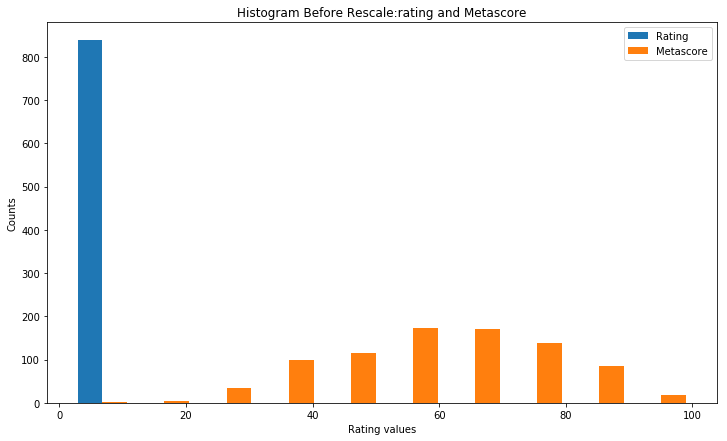

In [22]:
plt.figure(figsize=(12,7))
plt.hist([movie_data.Rating,movie_data.Metascore]
         ,bins=10,
         label=("Rating","Metascore"))
plt.title("Histogram Before Rescale:rating and Metascore")
plt.legend(loc='best')
plt.xlabel('Rating values')
plt.ylabel('Counts')
plt.show()

In [23]:
scaler=MinMaxScaler(feature_range=(0,5))

In [24]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 5))

In [25]:
scaler.get_params

<bound method BaseEstimator.get_params of MinMaxScaler(copy=True, feature_range=(0, 5))>

In [26]:
scaled_rating=scaler.fit_transform(movie_data[['Rating','Metascore']])
#we can fit the  model and transform like above(binarizer) it has a two steps process we
#can do it in one step with fit_transform

In [27]:
np.set_printoptions(precision=3) #to set precision of data ex; 3.652
print(scaled_rating[0:5,:])

[[4.366 3.652]
 [3.592 3.034]
 [3.803 2.865]
 [3.732 2.697]
 [3.028 1.629]]


In [28]:
rating_df=pd.DataFrame(data=scaled_rating,columns=['ScaledRating','ScaledMetascore'])
rating_df.head()

,ScaledRating,ScaledMetascore
0,4.366197,3.651685
1,3.591549,3.033708
2,3.802817,2.865169
3,3.732394,2.696629
4,3.028169,1.629213


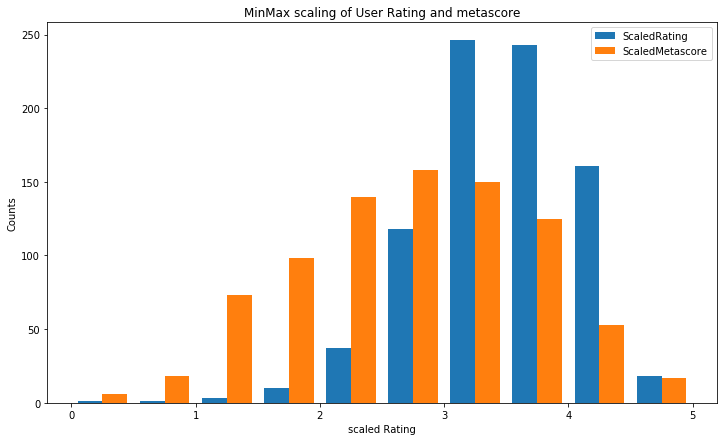

In [29]:
plt.figure(figsize=(12,7))
plt.hist([rating_df.ScaledRating,rating_df.ScaledMetascore]
         ,bins=10,
         label=("ScaledRating","ScaledMetascore"))
plt.title("MinMax scaling of User Rating and metascore")
plt.legend(loc='best')
plt.xlabel('scaled Rating')
plt.ylabel('Counts')
plt.show()

In [30]:
#After applying the mixmax scaler data points at same scale